In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Load MNIST data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# Preprocess the data
X = X / 255.0  # Normalize pixel values
y = to_categorical(y.astype(int))  # One-hot encode labels

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Deep MLP Model
model = Sequential([
    Flatten(input_shape=(784,)),  # Flatten 28x28 images to a 784-dim vector
    Dense(512, activation='relu'),  # First hidden layer with 512 units
    Dense(256, activation='relu'),  # Second hidden layer with 256 units
    Dense(128, activation='relu'),  # Third hidden layer with 128 units
    Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


c:\Users\saira\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8709 - loss: 0.4254 - val_accuracy: 0.9631 - val_loss: 0.1177
Epoch 2/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9721 - loss: 0.0905 - val_accuracy: 0.9745 - val_loss: 0.0869
Epoch 3/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9822 - loss: 0.0548 - val_accuracy: 0.9706 - val_loss: 0.0988
Epoch 4/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9868 - loss: 0.0417 - val_accuracy: 0.9667 - val_loss: 0.1096
Epoch 5/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9879 - loss: 0.0376 - val_accuracy: 0.9732 - val_loss: 0.0993
Epoch 6/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9904 - loss: 0.0296 - val_accuracy: 0.9756 - val_loss: 0.0862
Epoch 7/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9922 - loss: 0.0229 - val_accuracy: 0.9765 - val_loss: 0.0920
Epoch 8/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9938 - loss: 0.0191 - val_accuracy: 0.

Trial 10 Complete [00h 01m 12s]
val_accuracy: 0.9422857165336609

Best val_accuracy So Far: 0.9789523879686991
Total elapsed time: 00h 17m 47s
Best hyperparameters: {'num_layers': 3, 'units_0': 384, 'units_1': 480, 'learning_rate': 0.0003403705425649164, 'units_2': 32}
Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8730 - loss: 0.4585 - val_accuracy: 0.9604 - val_loss: 0.1354
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9697 - loss: 0.1002 - val_accuracy: 0.9721 - val_loss: 0.0942
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9815 - loss: 0.0591 - val_accuracy: 0.9728 - val_loss: 0.0904
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9877 - loss: 0.0395 - val_accuracy: 0.9766 - val_loss: 0.0786
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0291 - val_accuracy: 0.9771 - val_loss: 0.0829
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9931 - loss:

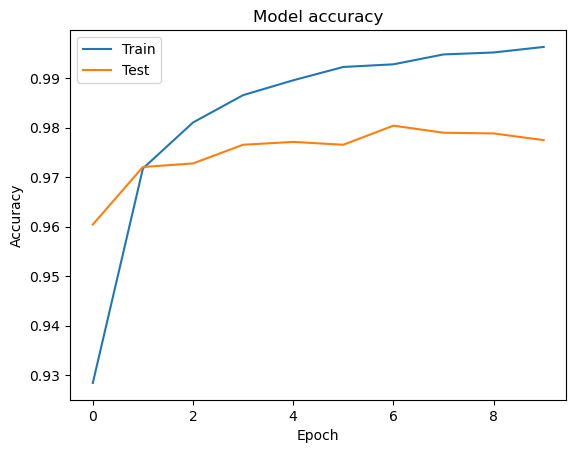

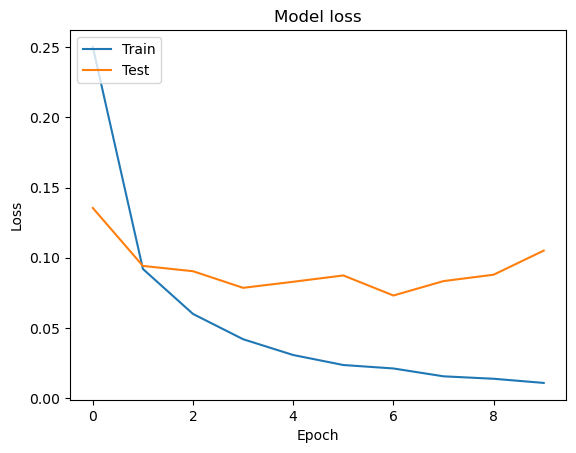

Best number of layers: 3
Best units in each layer: [384, 480, 32]
Best learning rate: 0.0003403705425649164


In [7]:
import keras
from keras import layers
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import kerastuner as kt
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# Preprocess the data
X = X / 255.0  # Normalize pixel values to [0, 1]
y = to_categorical(y.astype(int))  # One-hot encode labels

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model-building function
def build_model(hp):
    model = Sequential()
    
    # Define the number of hidden layers
    num_layers = hp.Int('num_layers', min_value=1, max_value=3, default=2)
    
    # Add hidden layers with variable number of units
    for i in range(num_layers):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), 
                               activation='relu'))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))  # 10 output classes for MNIST

    # Hyperparameter for learning rate
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Set up the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Maximum number of trials to search
    executions_per_trial=3,
    directory='kt_dir',
    project_name='mnist_tuning'
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# Get the best hyperparameters from the tuner
best_hp = tuner.get_best_hyperparameters()[0]
print("Best hyperparameters:", best_hp.values)

# Build the best model with the optimal hyperparameters
best_model = tuner.hypermodel.build(best_hp)

# Fetch batch_size from the best hyperparameters using dictionary indexing
batch_size = best_hp['batch_size'] if 'batch_size' in best_hp else 32

# Train the model using the best hyperparameters
history = best_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=batch_size)

# Evaluate the model on the test set
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Summary of best hyperparameters
print(f"Best number of layers: {best_hp['num_layers']}")
print(f"Best units in each layer: {[best_hp[f'units_{i}'] for i in range(best_hp['num_layers'])]}")
print(f"Best learning rate: {best_hp['learning_rate']}")
